In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [173]:
df = pd.read_csv("MallCustomers.csv")

In [101]:

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [102]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [103]:
df["Gender"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

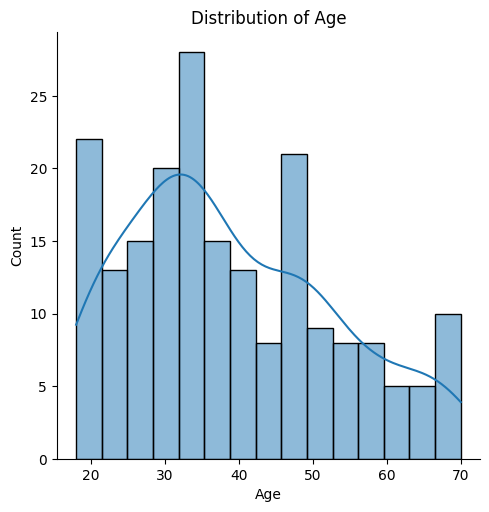

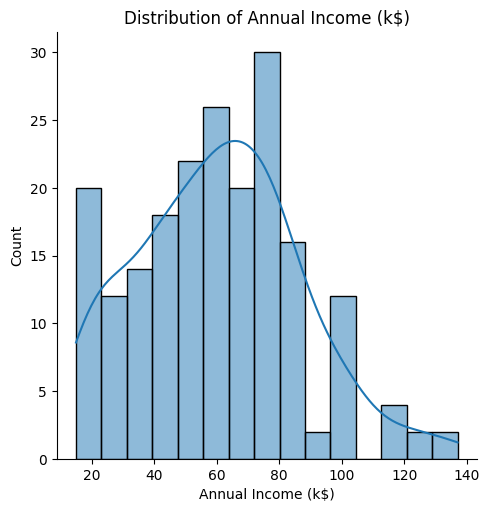

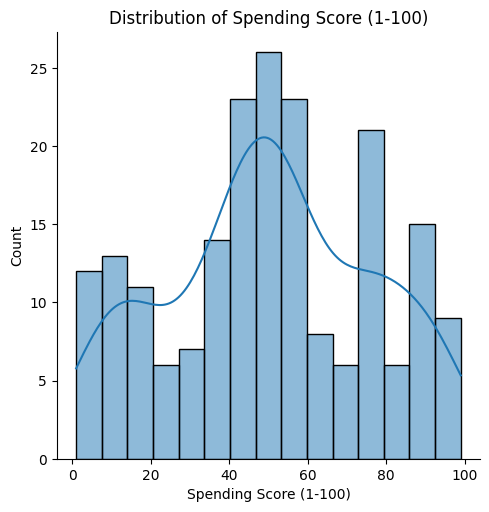

In [104]:
cols = df.columns[2:]
for i in cols:
    sns.displot(data=df,x=i,kind='hist',kde= True,bins=15)
    plt.title(f'Distribution of {i}')
    plt.show()

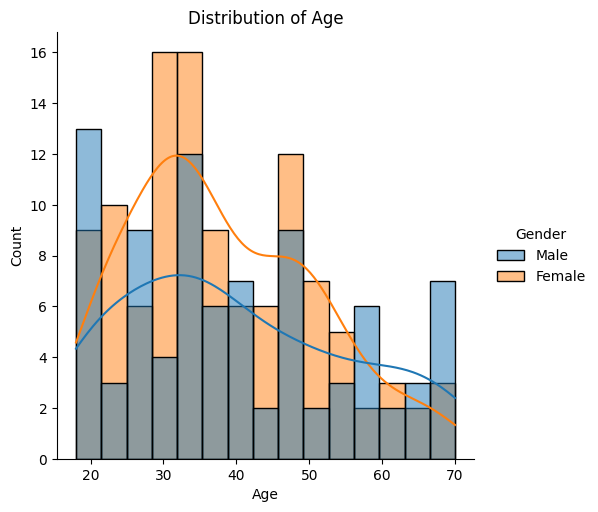

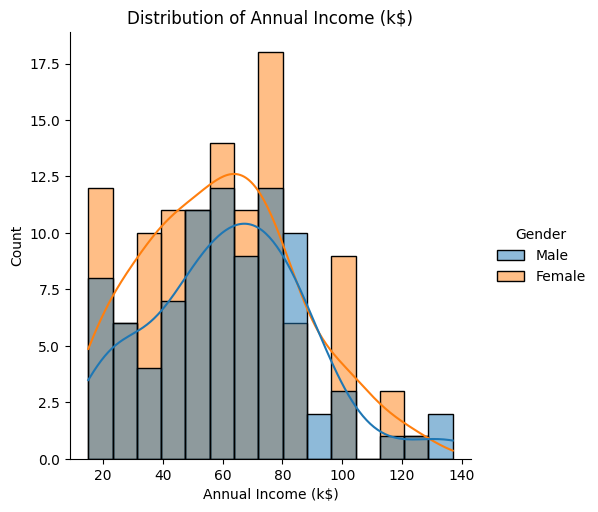

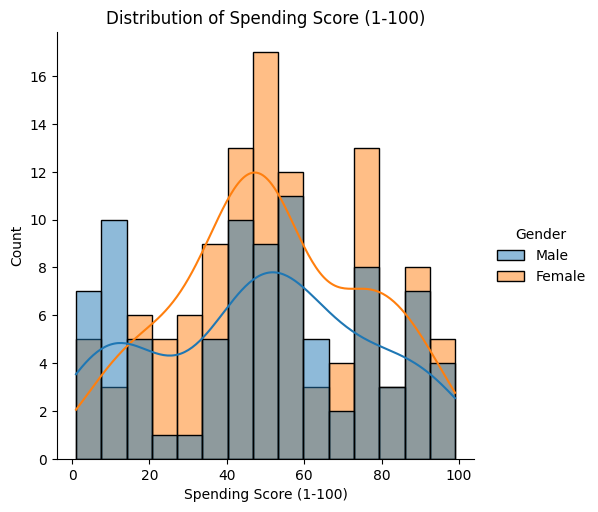

In [105]:
cols = df.columns[2:]
for i in cols:
    sns.displot(data=df,x=i,kind='hist',kde= True,bins=15,hue ='Gender')
    plt.title(f'Distribution of {i}')
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2612\3735993887.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Age", "Annual Income (k$)",'Spending Score (1-100)'])


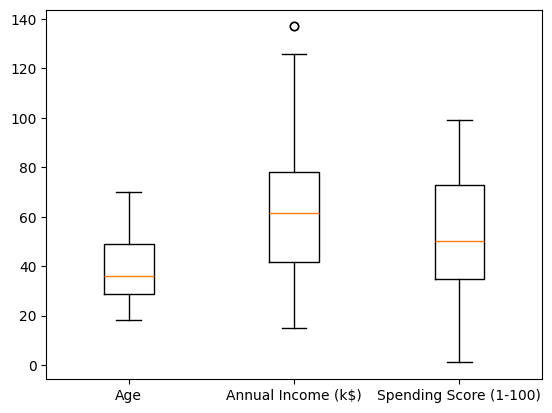

In [106]:
# Data for box plot
data = [df["Age"], df["Annual Income (k$)"],df['Spending Score (1-100)']]

# Create box plot
plt.boxplot(data, labels=["Age", "Annual Income (k$)",'Spending Score (1-100)'])
plt.show()

In [107]:
(max(df["Annual Income (k$)"])-df["Annual Income (k$)"].mean())/df["Annual Income (k$)"].std(ddof=1)

np.float64(2.9103678473873713)

In [108]:
for category, color in colors.items():
    subset = df[df['Gender'] == category]

    print(subset)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1   Male   19                  15                      39
1             2   Male   21                  15                      81
8             9   Male   64                  19                       3
10           11   Male   67                  19                      14
14           15   Male   37                  20                      13
..          ...    ...  ...                 ...                     ...
187         188   Male   28                 101                      68
192         193   Male   33                 113                       8
197         198   Male   32                 126                      74
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83

[88 rows x 5 columns]
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
2             3  Female   20            

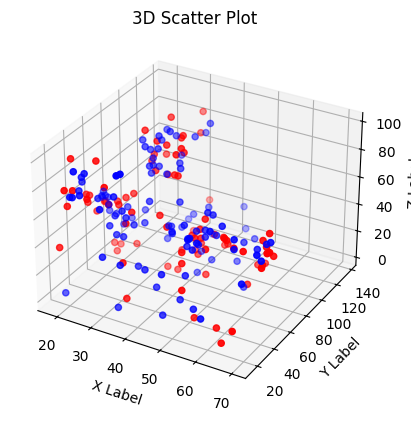

In [109]:

colors = {'Male': 'r', "Female": 'b'}
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for category, color in colors.items():
    subset = df[df['Gender'] == category]
    ax.scatter(subset["Age"], subset["Annual Income (k$)"], subset['Spending Score (1-100)'], c=color, label=category)

# Labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

  

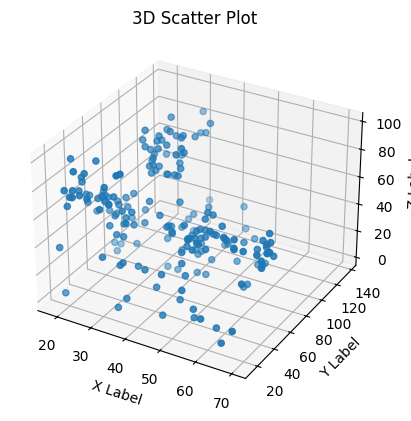

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"], df["Annual Income (k$)"],df['Spending Score (1-100)'])

# Labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

In [111]:
scaled=df[["Age","Annual Income (k$)",'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(scaled)

In [112]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Gender'] = df['Gender']

<Figure size 640x480 with 0 Axes>

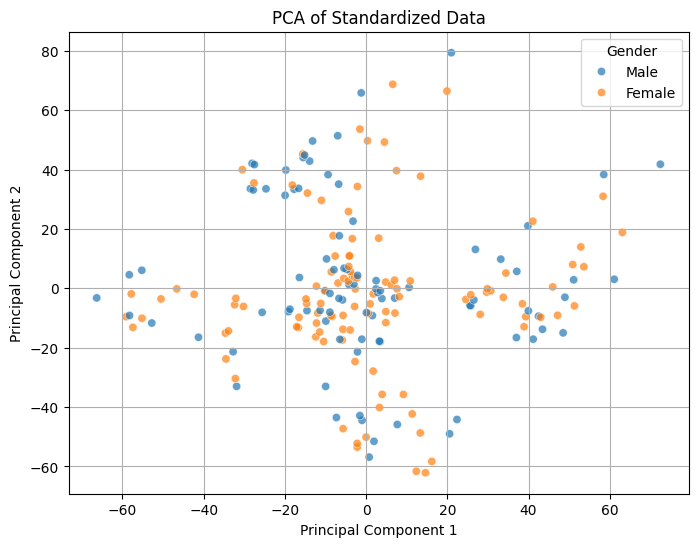

In [113]:
colors = {'Male': 'r', "Female": 'b'}
fig = plt.figure()




plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df,x="PC1",y="PC2", alpha=0.7,hue="Gender")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Data')
plt.grid(True)
plt.show()

In [114]:
print(sum(pca.explained_variance_ratio_))

0.8922373735506912


In [115]:
pca.components_

array([[-0.1889742 ,  0.58864102,  0.7859965 ],
       [ 0.1309652 ,  0.80837573, -0.57391358]])

<Figure size 640x480 with 0 Axes>

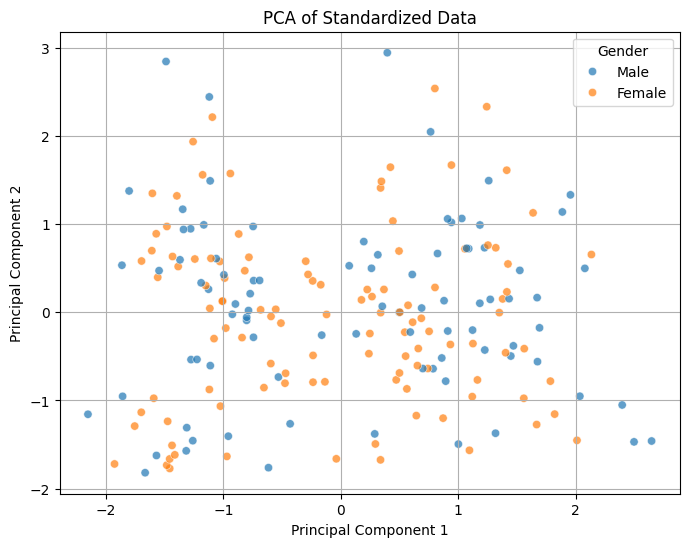

In [116]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Gender'] = df['Gender']

colors = {'Male': 'r', "Female": 'b'}
fig = plt.figure()




plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df,x="PC1",y="PC2", alpha=0.7,hue="Gender")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Data')
plt.grid(True)
plt.show()

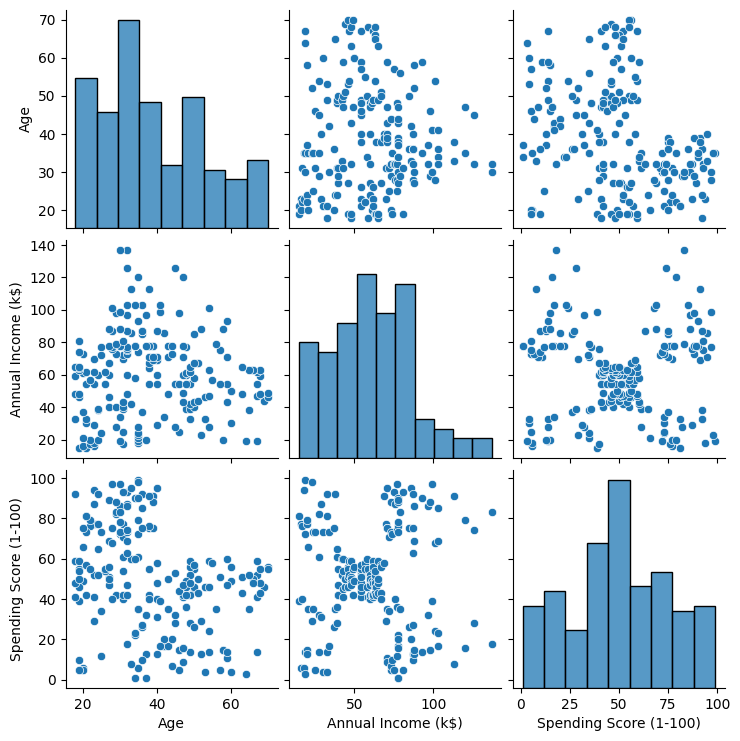

In [117]:
sns.pairplot(df[["Age", "Annual Income (k$)",'Spending Score (1-100)']])

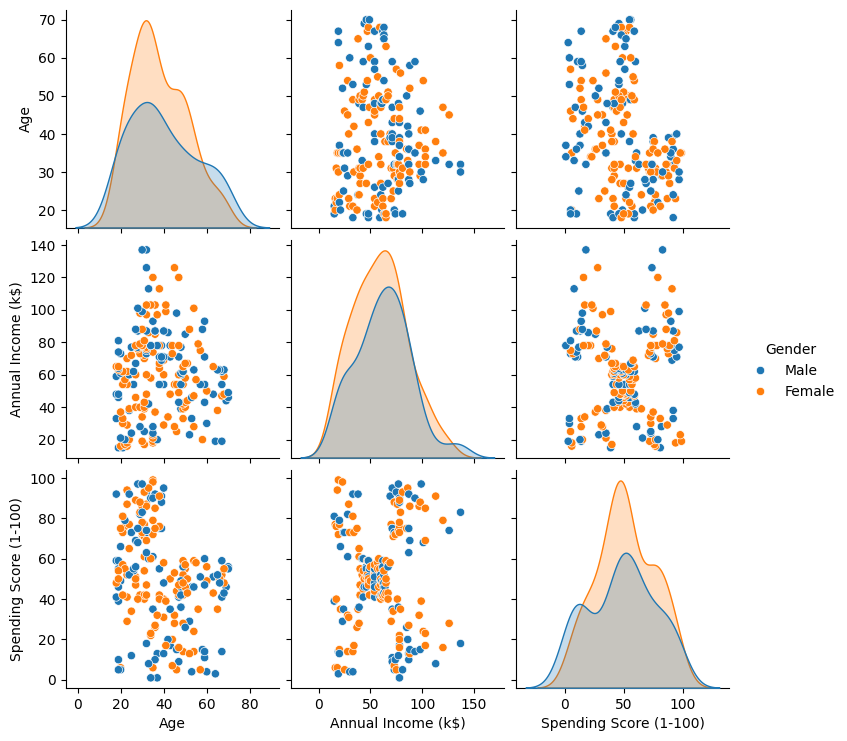

In [118]:
sns.pairplot(df[["Gender","Age", "Annual Income (k$)",'Spending Score (1-100)']],hue="Gender")

In [119]:
df[["Age", "Annual Income (k$)",'Spending Score (1-100)']].corr()
corr=df[["Age", "Annual Income (k$)",'Spending Score (1-100)']].corr()

<Axes: >

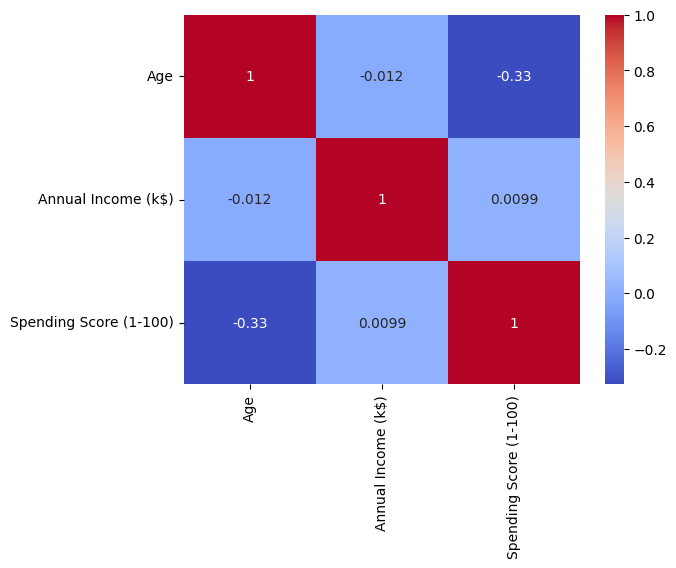

In [120]:
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [121]:
#dff=pd.get_dummies(df,drop_first=True,dtype=int)
#dff.head()

ValueError: x and y must have same first dimension, but have shapes (9,) and (18,)

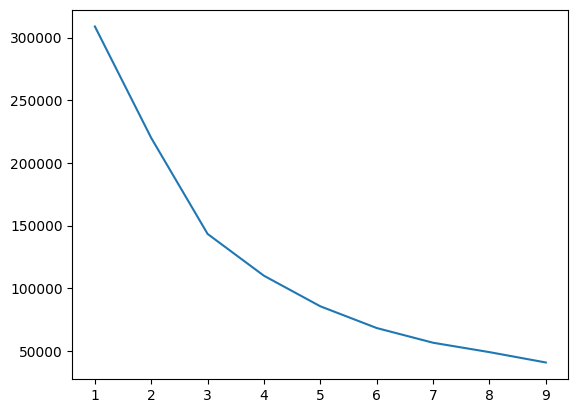

In [153]:
inertia=[]
for j in range(1,10):
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df[["Age", "Annual Income (k$)",'Spending Score (1-100)']])
        inertia.append(kmeans.inertia_)
    plt.plot(range(1,10),inertia)


plt.show()




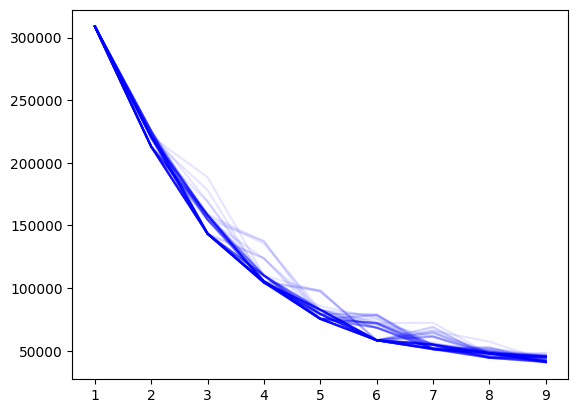

In [164]:

for j in range(1,100):
    inertia=[]
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df[["Age", "Annual Income (k$)",'Spending Score (1-100)']])
        inertia.append(kmeans.inertia_)
    plt.plot(range(1,10),inertia,alpha=0.1,color="blue")


plt.show()


In [167]:
cluster = KMeans(n_clusters=i,n_init=1000)
cluster.fit(df[["Age", "Annual Income (k$)",'Spending Score (1-100)']])

KMeans(n_clusters=9, n_init=1000)

In [175]:
cluster.labels_
df["labels"] = cluster.labels_
pca_df['labels'] = df['labels']


In [176]:
pca_df.head()

,PC1,PC2,Gender,labels
0,-0.615720,-1.763481,Male,6
1,-1.665793,-1.820747,Male,2
2,0.337862,-1.674799,Female,4
3,-1.456573,-1.772430,Female,2
4,-0.038465,-1.662740,Female,6


<Figure size 640x480 with 0 Axes>

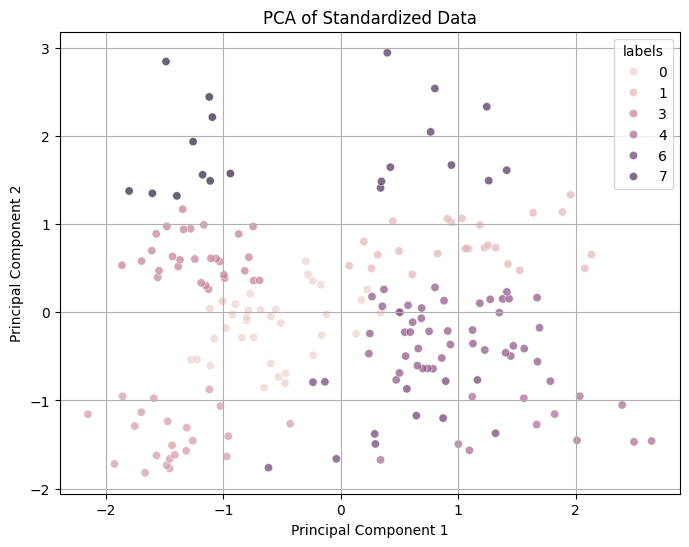

In [177]:
fig = plt.figure()




plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df,x="PC1",y="PC2", alpha=0.7,hue="labels")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Data')
plt.grid(True)
plt.show()